## A brief intorduction to EDA using Pandas
<b>
    Author:<i> Dr. Anil P. Singh, Saffron. </i>
</b>

## Data Exploration 

Data Exploration is the first and probably the most critical step in an analysis or product development life cycle.
* Purpose of exploration is to:
 * understand data in context of the problem we're trying to solve
 * uncover mistakes or lapses in the data collection and curation
 * uncover insights and hidden patterns; 
 * providing actionable insights to the business 
 * help build better models downstream
 * uncover the data quality issues like:
   * duplication, 
   * missing information
   * presence of outliers
 * build knowledge base for next steps
   * data cleaning
   * feature selection and engineering steps
   * choice of algorithms, hyper parameters
   * deployment and monitoring decisions
   * maintainence and upgradation

Speaking loosely, EDA is set of actions one performs to understand the suitability of the data to solve the problem at hand. The phrase <i> Exploratory Data Analysis </i> was first coined and used by J. W. Tukey who systematically used the descriptive statistics for his ground breaking work in Physical & Social sciences. 

## Exploration Framework

Using a framework built upon Tukey's ideas the exploration exercise can be divided into following sequence of tasks:

* <b>Global Analysis</b>
 * Understand the data collection and bias
 * Number of features & records in the dataset
 * Understand the meaning and business context of features
 * Understanding the type (numeric, text) & nature (categoric, descriptive) of the features
 * Check if there are duplicate rows in the dataset
 * Check if there are rows with high percentage of missing features
 * Check if there are rows with high percentage of inconsistent values
 * Perform checksum tests if the pertinent checksums are provided
 
* <b>Univariate Analysis</b> (one feature at a time)
 * Are the values consistent with business constraints?
 * What is the percentage of missing values for the feature?
 * Tukey suggests collecting 5 number summary
   * Smallest Value, Largest Value, Median, Upper Quartile, Lower Quartiles
 * We suggest adding a few more to original 5
   * Mean, Mode, Standard dev, Skewness, Curtosis
   
 * Outlier Detection
   * Outliers are the unusual observations relative to bulk of data.
   * A simplistic way to identify candidate outliers is to tag points
     * that are >1.5*IQR from the observed median 
   
 * Graphical Analysis
   * Historgrams/Probability Distributions
   * Bar Charts, Box Diagrams
   * Box & Whisker plots
 
* <b>Bivariate Analysis</b> (pairwise analysis of features)
 * Numerical vs Numerical (e.g : income & expenditure)
 * Categorical vs Numerical (e.g : gender & income)
   *  Analysis of Variance
 * Categorical vs Catergorical (e.g : gender vs department)
 * Graphic Analysis
   * Scatter Plots, Correlation/Association Map

* <b> Multivariate Analysis</b> (Analyzing variables in groups of > 2) 
 * Custering Analysis
 * Principal Component Analysis (PCA)
 * Multiple Correspondence Analysis (MCA)
 
## This Notebook

This notebook walks us through some of the tasks listed in the framework above. The material falls short off being a comprehensive tutorial, nor is it our intention to present it so. Our purpose is to introduce both the novice and experienced analysts into an attitude of framework oriented exploration instead of performing random testing.

## Global Analysis

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('bmh')

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df['Id'] = df['Id'].astype(str)
df_test['Id'] = df_test['Id'].astype(str)

#### How many rows, columns are there in the dataset?

In [3]:
num_rows = df.shape[0]
num_features = df.shape[1]
print("Number of features: ",num_features)
print("Number of rows",num_rows)

Number of features:  81
Number of rows 1460


#### What is the business context & data type for each feature ?

In [4]:
feat_desc = []
for line in open('feature_description.txt'):
    line = [l.strip() for l in line.strip().split(':')]
    if len(line)!=2: continue
    feat_desc.append(line)
    
df_desc = pd.DataFrame(feat_desc,columns = ['Feature','Description'])


columns = list(df.columns)
info = []

for col in columns:
    col = col.strip()
    if col == 'Id' : continue
    #Finding the data type
    dtype = str(df[col].dtype)
    #Create a filter to select description
    df_desc_filter = df_desc['Feature']==col
    #Get the description
    dfdesc = df_desc.loc[df_desc_filter, ['Description']]
    desc = 'UNK'
    if len(dfdesc)>0 :
        desc = dfdesc.iloc[0]['Description']
    info.append([col,dtype,desc])

df_info = pd.DataFrame(info,columns=['Feature','Data Type', 'Description'])


pd.set_option('display.max_rows',None)
display(df_info)

,Feature,Data Type,Description
0,MSSubClass,int64,The building class
1,MSZoning,object,The general zoning classification
2,LotFrontage,float64,Linear feet of street connected to property
3,LotArea,int64,Lot size in square feet
4,Street,object,Type of road access
5,Alley,object,Type of alley access
6,LotShape,object,General shape of property
7,LandContour,object,Flatness of the property
8,Utilities,object,Type of utilities available
9,LotConfig,object,Lot configuration


#### Are there duplicate rows in the dataset?

In [5]:
#Create "is_duplicate" filter on df
mask = df.duplicated()

#Select duplicated rows and count them
num_dups = len (df[mask])

print("Number of duplicated rows: ",num_dups)

Number of duplicated rows:  0


Since there is no duplication of records we don't need to do anything.

#### Distribution of missing values over the rows ?

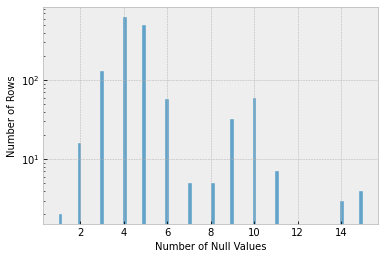

In [6]:
#Lets first create a 'boolean' dataframe of same shape as df.
df2 = df.isnull()

#Count number of 'True' in each row (axis=1, horizonal sum) 
null_count = df2.sum(axis=1) 

sns.histplot(null_count, kde=False)
plt.yscale('log')
plt.xlabel('Number of Null Values')
plt.ylabel('Number of Rows')
plt.show()


This is the distribution of missing values across rows. Most of the rows have 3-6 missing values, and about a 100 or so have more. We can choose to either drop such rows or keep them aside for further analysis. Currently we will keep them in.

#### Distribution of inconsistent values across the rows

No business rules are provided here, so we are skipping this test.

#### Checksum Testing

No checksums are provided here, so we're skipping this test

### Conclusions

* No major data quality issues spotted at the global level.
* About a 10th of records/rows have more than 6 missing values out of 80 total features. 
 * We're postponing the decision on these rows until after the column based analysis.
* We can now proceed to Univariate Analysis

## Univariate Aanalysis

#### Data values & types, missing values and measure of central tendency

In [7]:
columns = list(df.columns)
info = []
for col in columns:
    data_type = str(df[col].dtype)
    null = df[col].isnull().sum()
    uniq = df[col].nunique()

    min_val,max_val,mean_val,mode_val,mode_freq= None,None,None,None,None
    if 'float' in data_type or 'int' in data_type :
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = round(df[col].mean(),2)   
        mode_val = df[col].mode()[0]
        mode_freq = df[col].value_counts()[mode_val]

    info.append([col,data_type,num_rows-null,null,uniq,min_val,max_val,mean_val,mode_val,mode_freq])

#Converting into a data frame for better print
info_names = ['Feature Name','Data Type','Not Null Occ',
            'Null Occ','Unique Occ','Min','Max','Mean',
            'Mode','Mode Frequency']

info = pd.DataFrame(info,columns=info_names)
info = info.sort_values(['Null Occ'],ascending=['False'])
pd.set_option('display.max_rows',None)
display(info)

,Feature Name,Data Type,Not Null Occ,Null Occ,Unique Occ,Min,Max,Mean,Mode,Mode Frequency
0,Id,object,1460,0,1460,NaN,NaN,NaN,NaN,NaN
38,TotalBsmtSF,int64,1460,0,721,0.0,6110.0,1057.43,0.0,37.0
39,Heating,object,1460,0,6,NaN,NaN,NaN,NaN,NaN
79,SaleCondition,object,1460,0,6,NaN,NaN,NaN,NaN,NaN
41,CentralAir,object,1460,0,2,NaN,NaN,NaN,NaN,NaN
43,1stFlrSF,int64,1460,0,753,334.0,4692.0,1162.63,864.0,25.0
44,2ndFlrSF,int64,1460,0,417,0.0,2065.0,346.99,0.0,829.0
45,LowQualFinSF,int64,1460,0,24,0.0,572.0,5.84,0.0,1434.0
46,GrLivArea,int64,1460,0,861,334.0,5642.0,1515.46,864.0,22.0
47,BsmtFullBath,int64,1460,0,4,0.0,3.0,0.43,0.0,856.0


Conclusions: Following categorical features are missing in data more than 10% of the times.
    
* LotFrontage
* FireplaceQu
* Fence
* Alley
* MiscFeature
* PoolQC

Next steps:
    * <b>Simplistic fix </b> : Drop these columns
    * <b>Alternative fix </b> : Check if the presence or absence of these features have a forebearance on the house prices.

We will take the 'Alternative route' and eventually treat missing values as a separate category in itself.

#### Descriptive Statistics for Numeric Columns

In [8]:
columns = list(df.columns)
info = []
for col in columns:
    data_type = str(df[col].dtype)
    null = df[col].isnull().sum()
    uniq = df[col].nunique()
    if not ('float' in data_type or 'int' in data_type):continue
    # Calculate mean
    mean = df[col].mean()
    # Calculate mode
    mode = df[col].mode()[0]
    # Calculate median
    median = df[col].median()
    # Calculate skewness
    skewness = df[col].skew()
    # Calculate kurtosis
    kurtosis = df[col].kurt()
    # Calculate min
    minm = df[col].min()
    # Calculate max
    maxm = df[col].max()
    # Calculate quartile boundaries (Series: data, index)
    quartiles = df[col].quantile([0.25, 0.5, 0.75])

    q25,q50,q75 = quartiles[0.25],quartiles[0.5],quartiles[0.75]

    l = [minm,maxm,mean,mode,median,kurtosis,skewness,q25,q50,q75,q75-q25]
    l = [round(li,2) for li in l]
    l = [col]+l
    info.append(l)

        
      
#Converting into a data frame for better print
info_names = ['Feature Name','Minm','Maxm','Mean','Mode',
            'Median','Kurtosis','Skewness',
            'q25','q50','q75','IQR']

info = pd.DataFrame(info,columns=info_names).sort_values(['Kurtosis'],ascending=True)
pd.set_option('display.max_rows',None)
display(info)


,Feature Name,Minm,Maxm,Mean,Mode,Median,Kurtosis,Skewness,q25,q50,q75,IQR
6,YearRemodAdd,1950.0,2010.0,1984.87,1950.0,1994.0,-1.27,-0.50,1967.00,1994.0,2004.00,37.00
35,YrSold,2006.0,2010.0,2007.82,2009.0,2008.0,-1.19,0.10,2007.00,2008.0,2009.00,2.00
19,HalfBath,0.0,2.0,0.38,0.0,0.0,-1.08,0.68,0.00,0.0,1.00,1.00
18,FullBath,0.0,3.0,1.57,2.0,2.0,-0.86,0.04,1.00,2.0,2.00,1.00
16,BsmtFullBath,0.0,3.0,0.43,0.0,0.0,-0.84,0.60,0.00,0.0,1.00,1.00
13,2ndFlrSF,0.0,2065.0,346.99,0.0,0.0,-0.55,0.81,0.00,0.0,728.00,728.00
5,YearBuilt,1872.0,2010.0,1971.27,2006.0,1973.0,-0.44,-0.61,1954.00,1973.0,2000.00,46.00
24,GarageYrBlt,1900.0,2010.0,1978.51,2005.0,1980.0,-0.42,-0.65,1961.00,1980.0,2002.00,41.00
34,MoSold,1.0,12.0,6.32,6.0,6.0,-0.40,0.21,5.00,6.0,8.00,3.00
23,Fireplaces,0.0,3.0,0.61,0.0,1.0,-0.22,0.65,0.00,1.0,1.00,1.00


###### Conclusion: Features with very high skew and curtosis

Both these metrics indicate departure from Normal/Gaussian distribution. Several ML algorithms like regression and PCA assume the normality of underlying data and hence they can be impacted if those assumptions are not fulfilled. Such departures can lead to (i) biased parameter estimation (ii) reduced model performance because of overfitting on the outliers and (iii) misleading interpretation of the relative importance of the features.
 
 * Following features were identified as the ones showing high skewedness
   * BsmtHalfBath	
   * BsmtHalfBath	
   * ScreenPorch	
   * BsmtFinSF2	
   * KitchenAbvGr	
   * LowQualFinSF	
   * 3SsnPorch	
   * LotArea	
   * PoolArea
   * MiscVal
   
 * Following features were identified as the ones showing high kurtosis
   * MasVnrArea	
   * EnclosedPorch
   * BsmtFinSF1	
   * TotalBsmtSF
   * BsmtHalfBath
   * LotFrontage
   * ScreenPorch
   * BsmtFinSF2
   * KitchenAbvGr
   * LowQualFinSF
   * 3SsnPorch
   * LotArea
   * PoolArea
   * MiscVal
   

 * Each of these features, especially the ones with high kurtosis and skew should be investigated individually to understand the root cause and mitigation. Highly skewed features can in general be dealt using one or more of the following strategies:
 
   * <b>Logarithmic Transformation</b>: Instead of raw values use logarithm of the feature, especially if it follows a power law
   * <b>Box-Cox Transformations</b> : A family of power transfromations used to make distributions look closer to the normal
   * <b>Winsorizing</b> : Simply throw away the extreme values or outliers
   * <b>Binning</b> : Discretize the continous information by bucketing procedure
 
If the skew is a fundamental character of your data which can't be transformed away without the loss of information, then conisder using modeling approaches that robust to non normality e.g. the decision trees, random forest etc.

#### Graphical Analysis for the numeric variables
We will begin by taking a look at the histograms for the susupects we've identified so far. Then we will look at the probabilities for everything else.

<ipython-input-11-bfb999bae12c>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=False,ax=a)


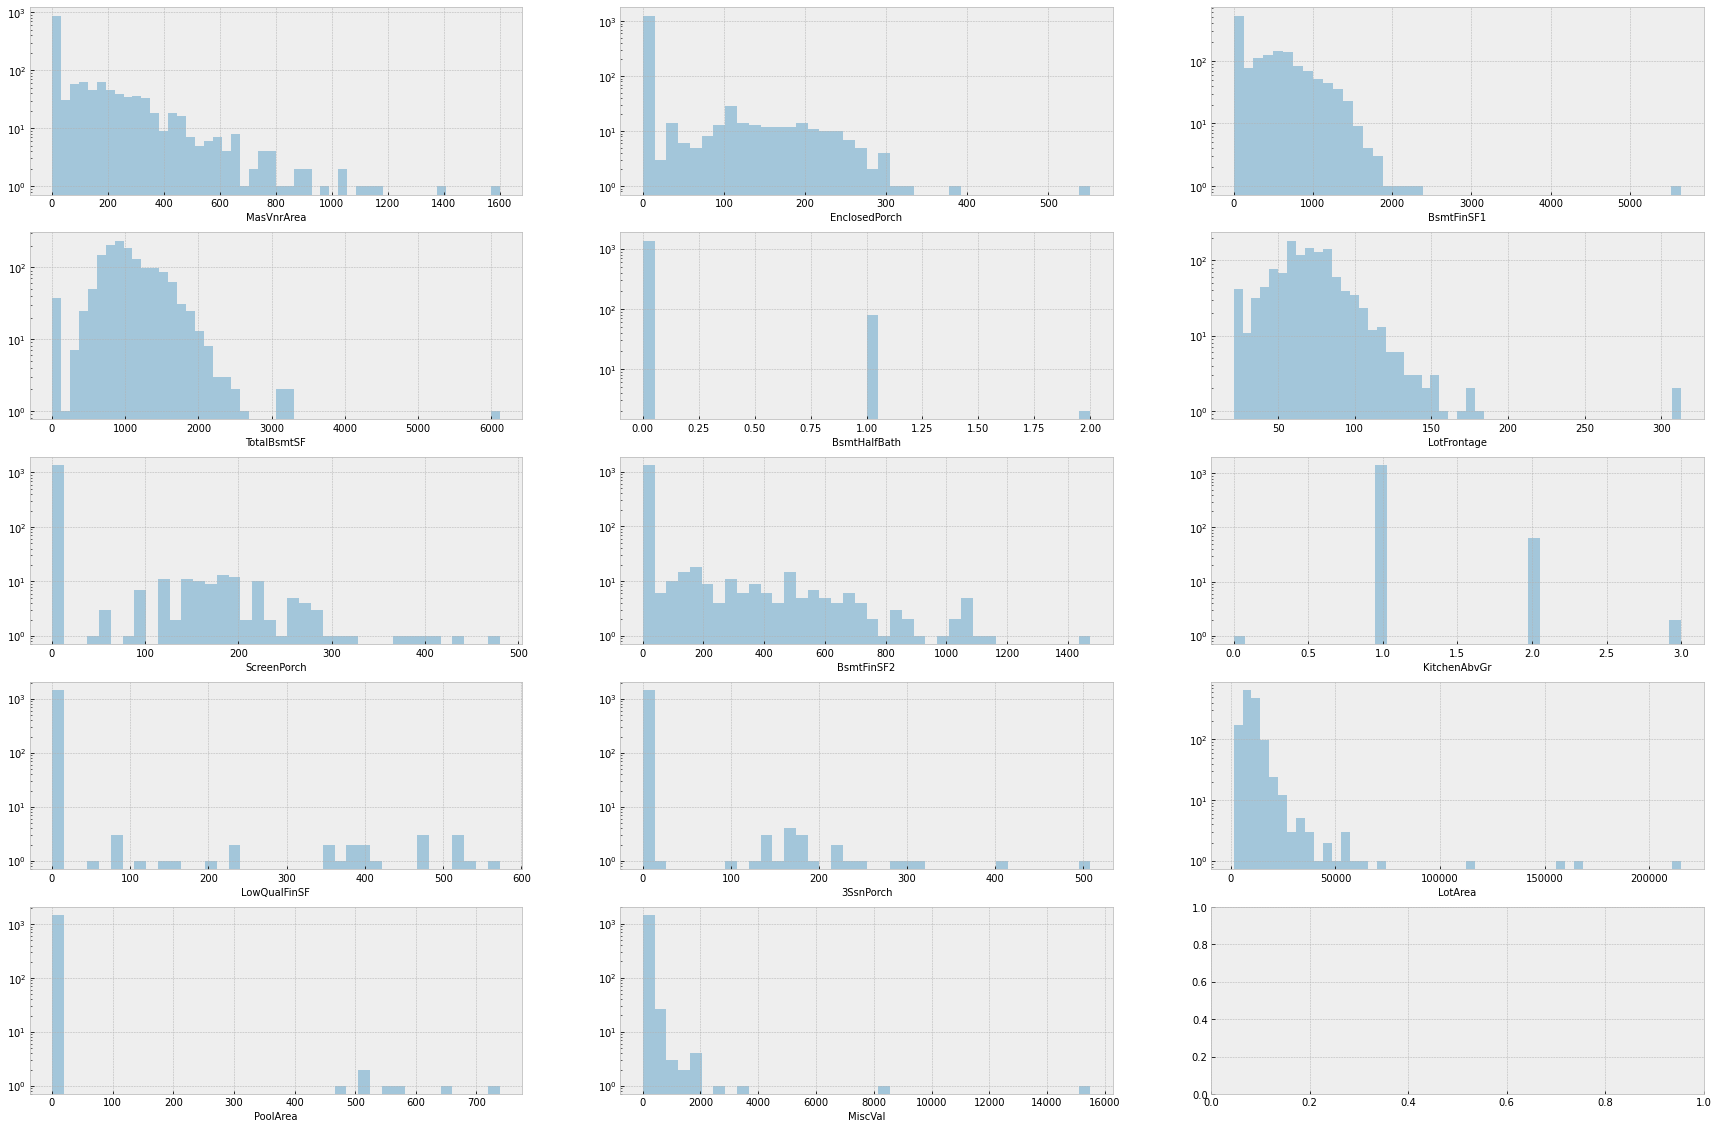

In [11]:
investigate = ['MasVnrArea', 'EnclosedPorch', 'BsmtFinSF1', 'TotalBsmtSF', 
 'BsmtHalfBath', 'LotFrontage', 'ScreenPorch', 'BsmtFinSF2', 
 'KitchenAbvGr', 'LowQualFinSF', '3SsnPorch', 'LotArea', 
 'PoolArea', 'MiscVal']


def draw_distributions(columns,chart_type=None):
   
    #Lets arrange the bar charts into grid of 3xlines
    grid_x = 3
    grid_y = int(len(columns)/grid_x)+1

    fig,axes = plt.subplots(grid_y,grid_x,figsize=(500,30))
    ai = [item for sublist in axes for item in sublist]
    info = []
    for col,a in zip(columns,ai):
        #Non numeric columns are not our cuppa
        data_type = str(df[col].dtype)
        if not data_type in ('int64','float64'): continue
        #What chart to draw?
        if chart_type == None or chart_type == 'kde':
            sns.kdeplot(data=df[col],ax=a)
        if chart_type == 'Hist':
            sns.distplot(df[col],kde=False,ax=a)
        a.set_yscale('log')
        #a.set_xticklabels(a.get_xticklabels(),rotation=90)
        #a.set_xlabel(col)
        #a.set_ylabel("Number of Houses")
    
   
    return fig,axes


## Let us look at the distribution of numeric features among the investigates
fig1,axes1 = draw_distributions(investigate,chart_type='Hist')
fig1.set_figwidth(30)
fig1.set_figheight(20)
plt.show()

So we see some of our culprits are simply categoric features and we don't need to worry about them too much. But there are others like 'TotalBsmtSF' and 'BsmtFinSF2' where we have genuine assymetry. Note that big spike at zero might mean the absence of a basement - can we think of creating/engineering another feature "HasBasement" ?

<ipython-input-11-bfb999bae12c>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=False,ax=a)


<function matplotlib.pyplot.show(close=None, block=None)>

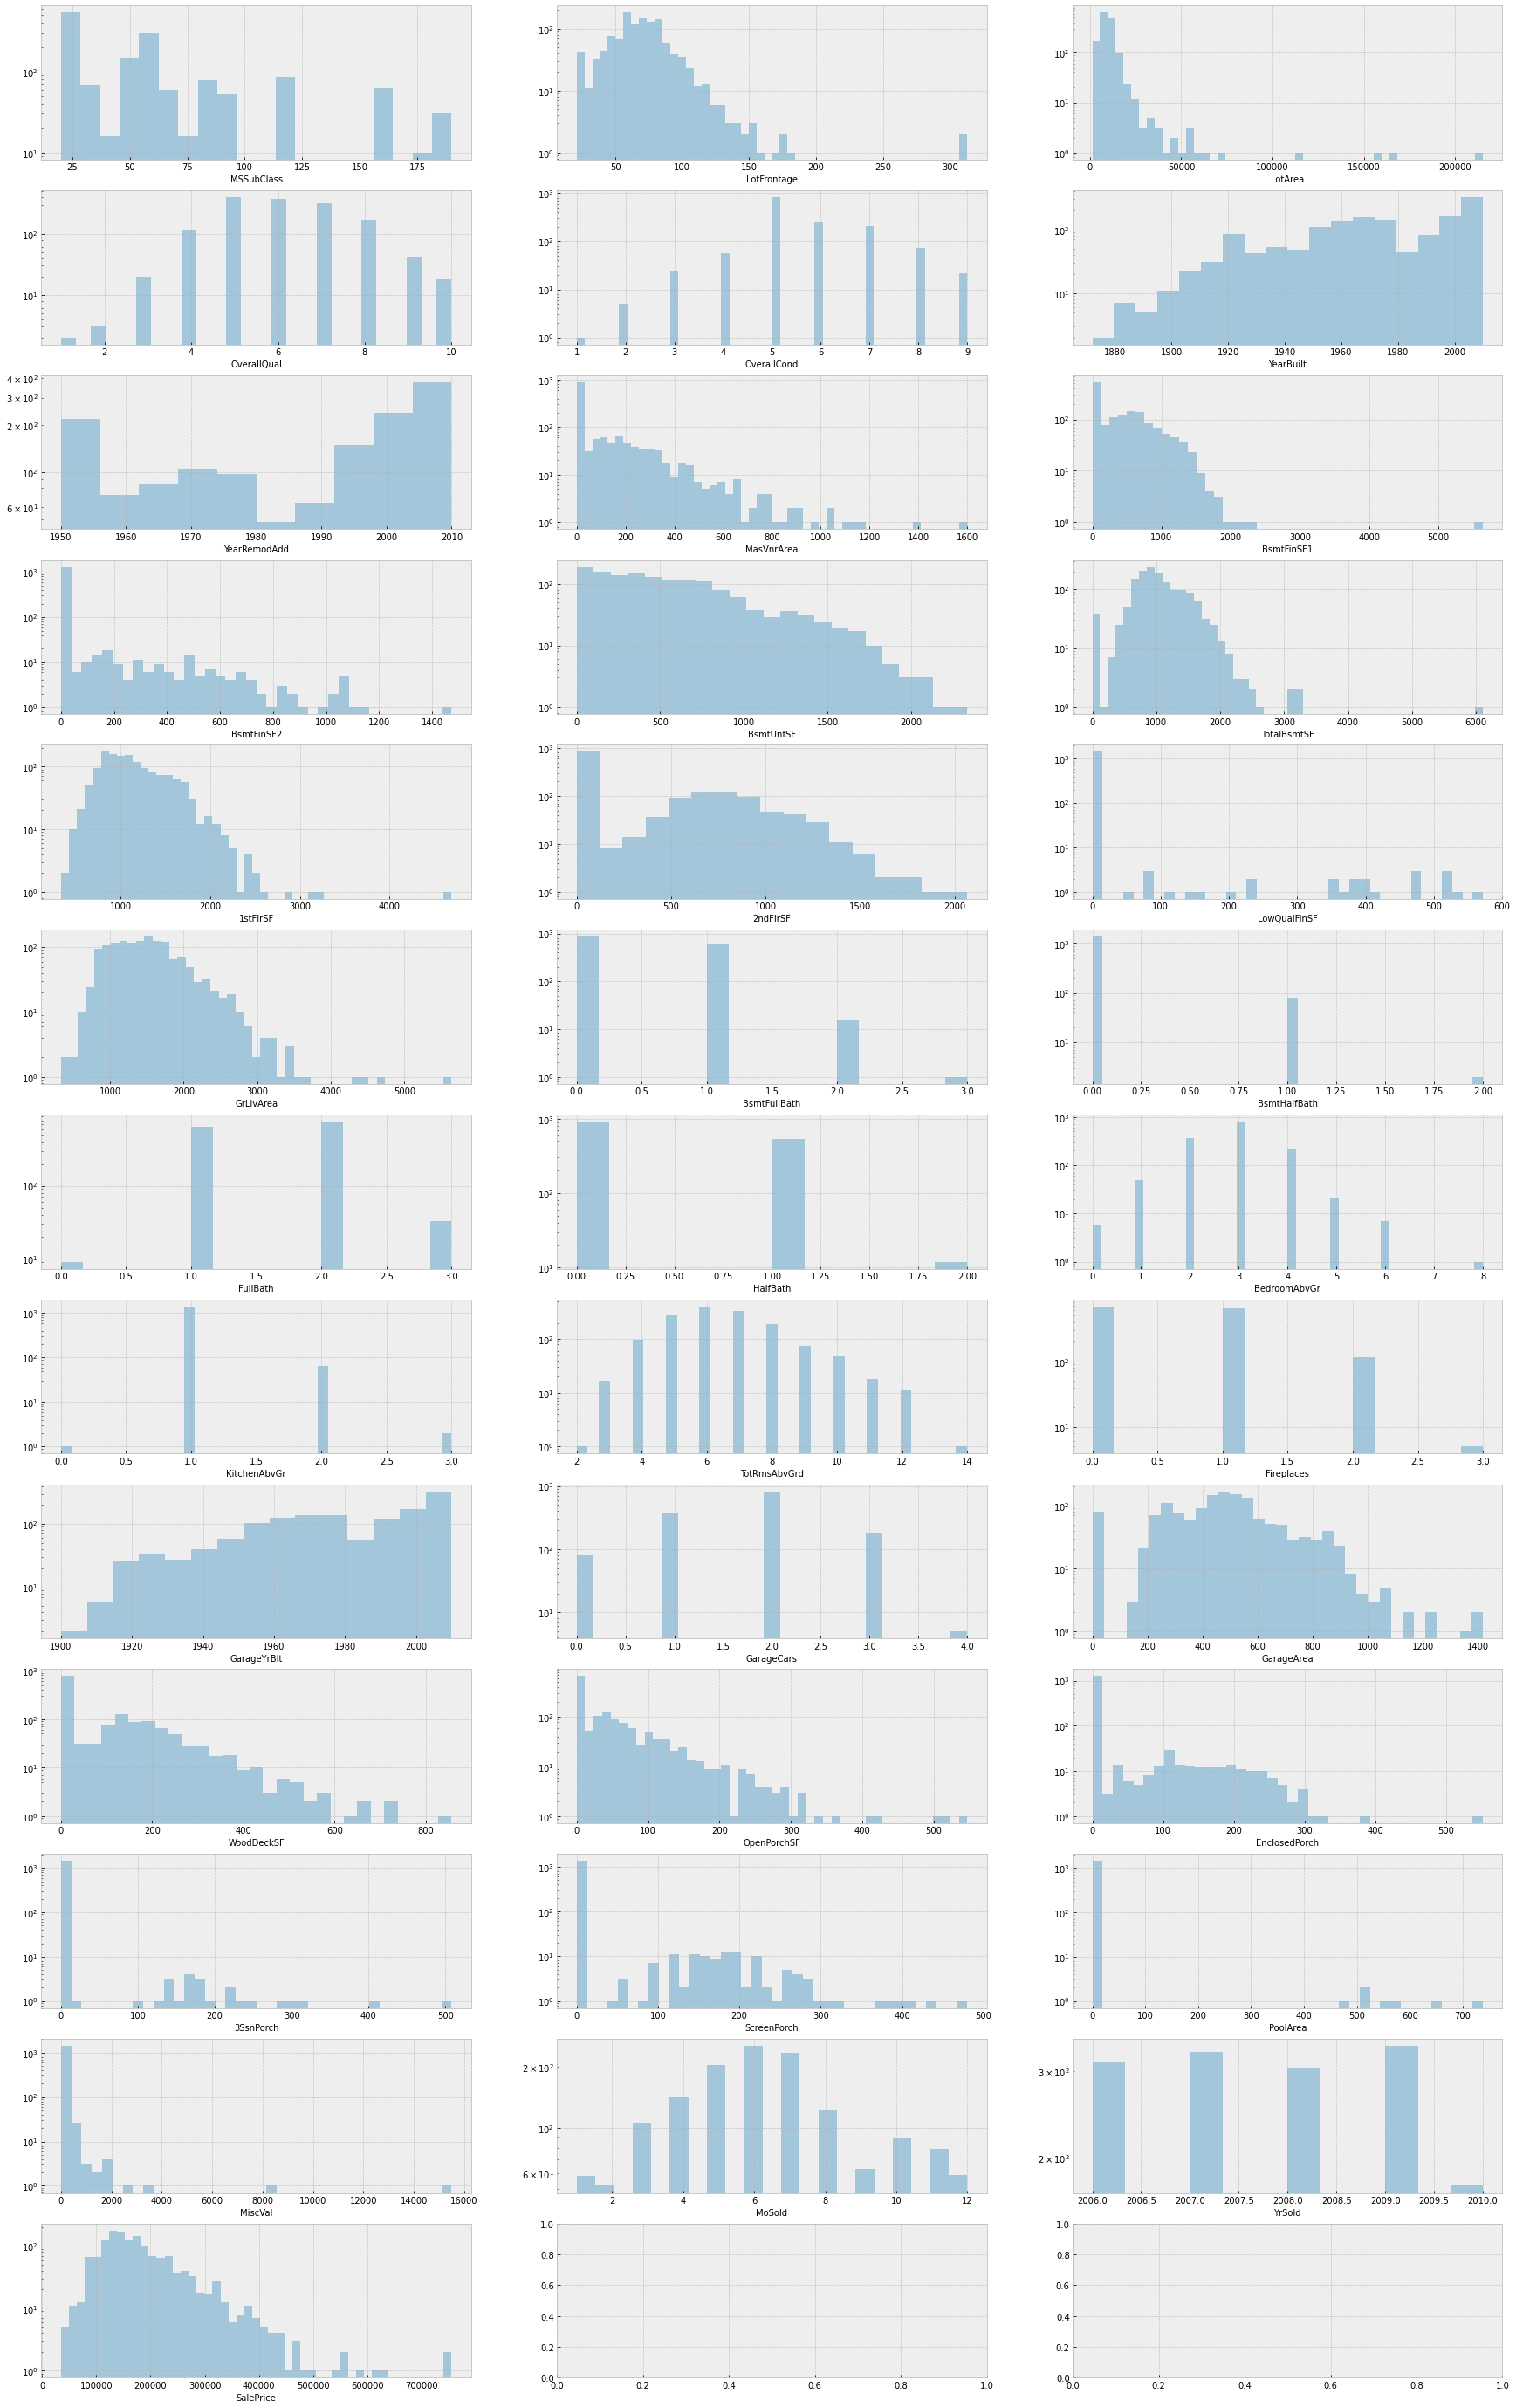

In [13]:
## This is going to be kde distributions for all the numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns
fig2,axes2 = draw_distributions(num_cols,chart_type='Hist')
fig2.set_figwidth(30)
fig2.set_figheight(50)
plt.show

We can clearly see that a few of these features are actually categoric and need to be dealt appropriately. This notebook will not dig deeper at this moment and we will move to non numeric features.

#### Graphical Analysis for non-numeric features

15


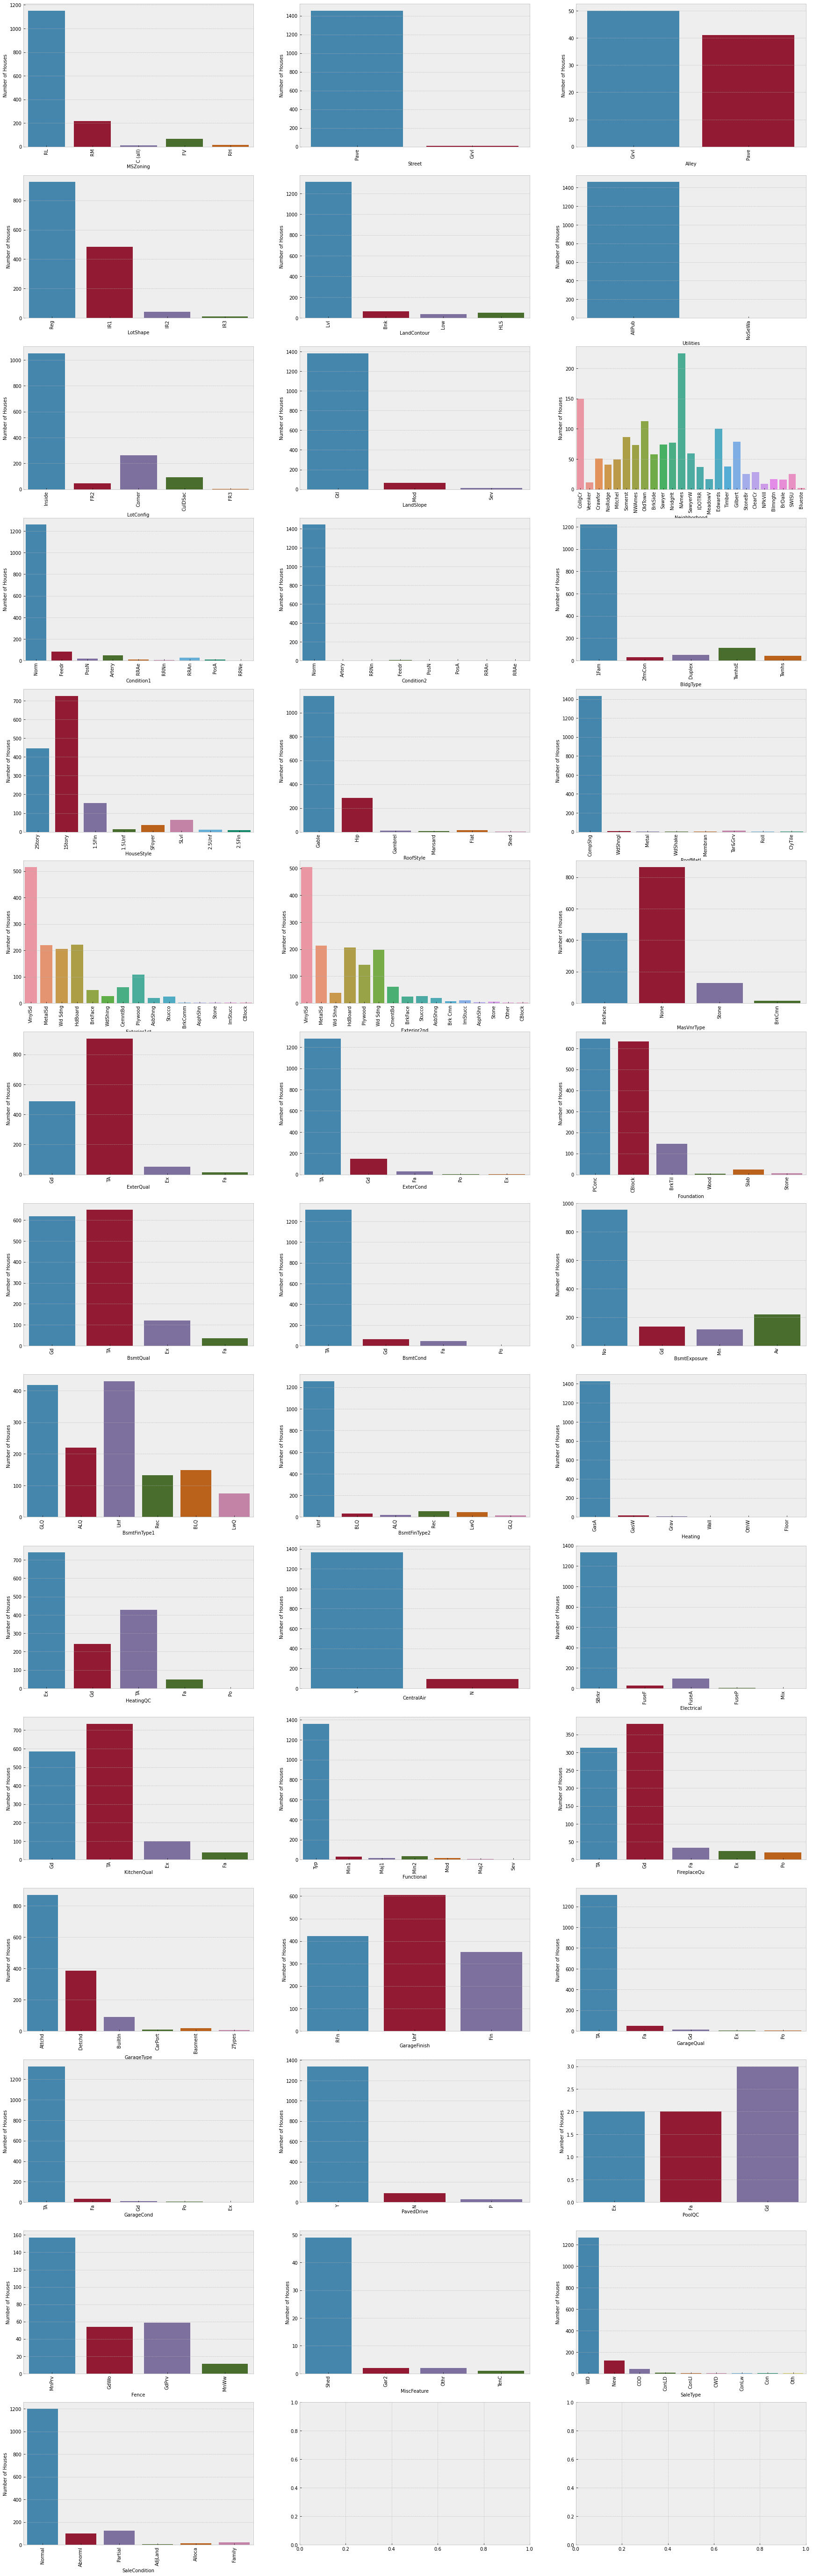

In [14]:
columns = list(df.columns)

#Lets find the columns that are categorical
cat_cols = df.select_dtypes(exclude=['int64','float64']).columns
cat_cols = cat_cols.drop(labels='Id')

#Lets arrange the bar charts into grid of 3xlines
grid_x = 3
grid_y = int(len(cat_cols)/grid_x)+1
print(grid_y)

fig,axes = plt.subplots(grid_y,grid_x,figsize=(500,30))
ai = [item for sublist in axes for item in sublist]
info = []
for col,a in zip(cat_cols,ai):
    data_type = str(df[col].dtype)
    null = df[col].isnull().sum()
    uniq = df[col].nunique()
    if col == 'Id' : continue
    if ('float' in data_type or 'int' in data_type):continue
    
    sns.countplot(x=col,data=df,ax=a)
    a.set_xticklabels(a.get_xticklabels(),rotation=90)
    a.set_xlabel(col)
    a.set_ylabel("Number of Houses")
fig.set_figwidth(30)
fig.set_figheight(100)

## Bivariate Target Analysis 

This notebook just scratches the surface of possibility with Bivariate Analysis only to demonstrate the attitude and process. We will soon publish another notbook to showcase a full bag of stuff that we can do.

In [ ]:
df_corr = (df[num_cols].corr()['SalePrice'][:-1]).sort_values(ascending=True)
f, ax = plt.subplots(1,1,figsize=(10,3))
ax = df_corr.plot.bar(rot=0,ax=ax)
labels  = ax.get_xticklabels()
a = ax.set_xticklabels(labels,rotation=90)

#### Categoric Features vs Numerical Target 

We use annova based approach. 

<b>NULL Hypothesis</b>: The target ('SalesPrice') has same means across different groups defined by the categorical feature

We will perform F-test and if p-value is less than some significance level (e.g., 0.05), the null hypothesis is rejected and we can assume that feature is correlated to 'SalesPrice'


In [ ]:
import scipy.stats as stats
categorical_cols = df.select_dtypes(include=['object']).columns
# loop through each categorical column and calculate the correlation with 'SalesPrice'
correlations = {}
for col in categorical_cols:
    if col=='Id':continue
    grouped = df.groupby(col)['SalePrice']
    f_stat, p_value = stats.f_oneway(*[group[1] for group in grouped])
    correlations[col]=p_value
f, ax = plt.subplots(1,1,figsize=(10,3))
s = pd.Series(correlations).sort_values(ascending=True)
sns.barplot(x=s.index, y=s.values,ax=ax)
labels  = ax.get_xticklabels()
a = ax.set_xticklabels(labels,rotation=90)

## Bivariate Analysis Predictor vs Predictor

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
numeric_features = numeric_features.drop('SalePrice',axis=1)
# compute the correlation matrix
corr_matrix = numeric_features.corr()
# create the heatmap
f, ax = plt.subplots(1,1,figsize=(15,5))
sns.heatmap(corr_matrix, ax=ax,cmap='coolwarm')

There are the pockets of high correlation in this map, lets print out the pairs that are highly correlated

In [ ]:
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] >= 0.6:
            print(corr_matrix.columns[i], '-', corr_matrix.columns[j], ':', corr_matrix.iloc[i,j])

Its reasonable to assume that "GarageCars" is correlated with "GarageArea" and "GrLivArea" is correlated with "TotalRoomsAboveGround". One can now either drop one off of each pair or do some rotation exercise like PCA to reduce the dimensionality

## Conclusion
We have demonstrated how can a well designed EDA be used to uncover the hidden insights in our data and also make sure that the models perform well. The insights/suggestions can be used to inform the decisions like feature selection, engineering  and model selection downstream. They can also be used to create reporting dashboards to be consumed by business teams.